In [228]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor ####### VIF
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler # Inbuilt functions for Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

In [229]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [230]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
print("--"*40)
print(df_train.describe())
print("--"*40)
print(df_train.info())

--------------------------------------------------------------------------------
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [232]:
print("--"*40)
print(df_test.describe())
print("--"*40)
print(df_test.info())

--------------------------------------------------------------------------------
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non

In [233]:
df_train = df_train.drop(['Cabin'],axis=1)
df_test = df_test.drop(['Cabin'],axis=1)

In [234]:
# Checking the percentage of missing values
round(100*(df_train.isnull().sum()/len(df_train.index)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Embarked        0.22
dtype: float64

In [235]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)

In [236]:
# Checking the percentage of missing values
round(100*(df_train.isnull().sum()/len(df_train.index)), 2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [237]:
df_train.dropna(subset=['Embarked'], inplace=True)

In [238]:
# Checking the percentage of missing values
round(100*(df_train.isnull().sum()/len(df_train.index)), 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [239]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [240]:
# Checking the percentage of missing values
round(100*(df_test.isnull().sum()/len(df_test.index)), 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Embarked        0.00
dtype: float64

In [241]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)

In [242]:
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True)

In [243]:
# Checking the percentage of missing values
round(100*(df_test.isnull().sum()/len(df_test.index)), 2)

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

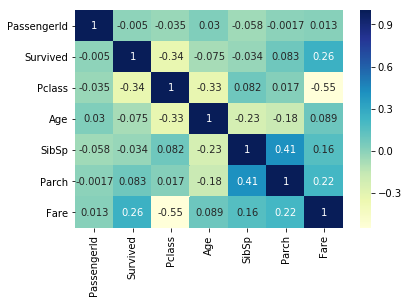

In [244]:
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')

In [245]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [246]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [247]:
df_train['Alone'] = [1 if x == 1 else 0 for x in df_train['FamilySize']]

In [248]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1


In [249]:
df_test['Alone'] = [1 if x == 1 else 0 for x in df_test['FamilySize']]

In [250]:
df_train = df_train.drop(['SibSp','Parch','FamilySize','Name'],axis=1)
df_test = df_test.drop(['SibSp','Parch','FamilySize','Name'],axis=1)

In [251]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone
0,1,0,3,male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,PC 17599,71.2833,C,0
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,female,35.0,113803,53.1000,S,0
4,5,0,3,male,35.0,373450,8.0500,S,1


In [252]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,Alone
0,892,3,male,34.5,330911,7.8292,Q,1
1,893,3,female,47.0,363272,7.0000,S,0
2,894,2,male,62.0,240276,9.6875,Q,1
3,895,3,male,27.0,315154,8.6625,S,1
4,896,3,female,22.0,3101298,12.2875,S,0


In [253]:
df_train = df_train.drop(['Ticket'],axis=1)
df_test = df_test.drop(['Ticket'],axis=1)

In [254]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,male,22.0,7.2500,S,0
1,2,1,1,female,38.0,71.2833,C,0
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,0
4,5,0,3,male,35.0,8.0500,S,1


In [255]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,0
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,0


In [256]:
#df_train['Title'] = df_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
#df_test['Title'] = df_test.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [257]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,0
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,0


In [258]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,male,22.0,7.2500,S,0
1,2,1,1,female,38.0,71.2833,C,0
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,0
4,5,0,3,male,35.0,8.0500,S,1


In [259]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,0
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,0


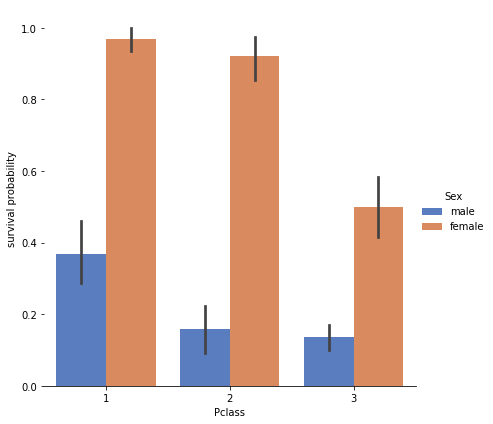

In [260]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

#### Above figure depicts that Females from 1st Class and 2nd class had better chances of being saved

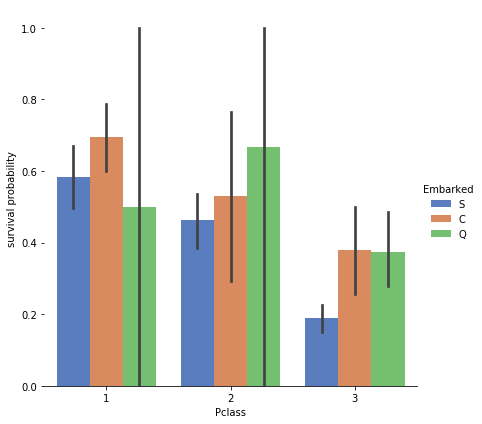

In [261]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Embarked", data=df_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

Probability of being saved was higher for port C for 1st Class

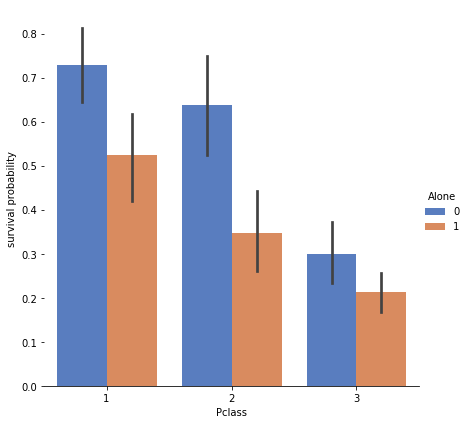

In [262]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Alone", data=df_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

People who were travelling alone had a better chance of surviving across all classes

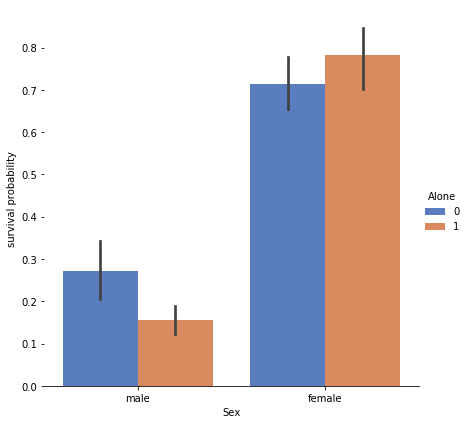

In [263]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Sex", y="Survived", hue="Alone", data=df_train,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")

In All cases female survival ratio is greater

In [264]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone
0,1,0,3,male,22.0,7.2500,S,0
1,2,1,1,female,38.0,71.2833,C,0
2,3,1,3,female,26.0,7.9250,S,1
3,4,1,1,female,35.0,53.1000,S,0
4,5,0,3,male,35.0,8.0500,S,1


In [265]:
df_test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Alone
0,892,3,male,34.5,7.8292,Q,1
1,893,3,female,47.0,7.0000,S,0
2,894,2,male,62.0,9.6875,Q,1
3,895,3,male,27.0,8.6625,S,1
4,896,3,female,22.0,12.2875,S,0


In [266]:
# List of variables to map

varlist =  ['Pclass']

# Defining the map function
def binary_map(x):
    return x.map({1: "1stClass", 2: "2ndClass",3:"3rdClass"})

# Applying the function to the housing list
df_train[varlist] = df_train[varlist].apply(binary_map)

In [267]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_train[['Sex', 'Pclass' , 'Embarked']], drop_first=True)

# Adding the results to the master dataframe
df_train = pd.concat([df_train, dummy1], axis=1)

In [268]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,1,0,3rdClass,male,22.0,7.2500,S,0,1,0,1,0,1
1,2,1,1stClass,female,38.0,71.2833,C,0,0,0,0,0,0
2,3,1,3rdClass,female,26.0,7.9250,S,1,0,0,1,0,1
3,4,1,1stClass,female,35.0,53.1000,S,0,0,0,0,0,1
4,5,0,3rdClass,male,35.0,8.0500,S,1,1,0,1,0,1


In [269]:
df_train = df_train.drop(['PassengerId','Pclass','Sex','Embarked'],axis=1)

In [270]:
df_train.head()

,Survived,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,1
3,1,35.0,53.1000,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,1,0,1


##### ------------------------ For Test Data we need to create dummies and delete trash variables and then scales it down and then use for fitting the model

In [271]:
# List of variables to map

varlist =  ['Pclass']

# Defining the map function
def binary_map(x):
    return x.map({1: "1stClass", 2: "2ndClass",3:"3rdClass"})

# Applying the function to the housing list
df_test[varlist] = df_test[varlist].apply(binary_map)

In [272]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_test[['Sex', 'Pclass' , 'Embarked']], drop_first=True)

# Adding the results to the master dataframe
df_test = pd.concat([df_test, dummy1], axis=1)

In [273]:
df_test = df_test.drop(['Pclass','Sex','Embarked'],axis=1)

In [274]:
df_test.head()

,PassengerId,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,892,34.5,7.8292,1,1,0,1,1,0
1,893,47.0,7.0000,0,0,0,1,0,1
2,894,62.0,9.6875,1,1,1,0,1,0
3,895,27.0,8.6625,1,1,0,1,0,1
4,896,22.0,12.2875,0,0,0,1,0,1


In [275]:
df_test.shape

(418, 9)

In [276]:
df_train.shape

(889, 9)

In [277]:
df_train.columns

Index(['Survived', 'Age', 'Fare', 'Alone', 'Sex_male', 'Pclass_2ndClass',
       'Pclass_3rdClass', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [278]:
df_test.columns

Index(['PassengerId', 'Age', 'Fare', 'Alone', 'Sex_male', 'Pclass_2ndClass',
       'Pclass_3rdClass', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [279]:
df_train.head()

,Survived,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,1
3,1,35.0,53.1000,0,0,0,0,0,1
4,0,35.0,8.0500,1,1,0,1,0,1


In [280]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (418, 8))

In [281]:
X_train.head()

,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0,1,0,1
1,38.0,71.2833,0,0,0,0,0,0
2,26.0,7.9250,1,0,0,1,0,1
3,35.0,53.1000,0,0,0,0,0,1
4,35.0,8.0500,1,1,0,1,0,1


In [282]:
Y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [283]:
X_test.head()

,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,34.5,7.8292,1,1,0,1,1,0
1,47.0,7.0000,0,0,0,1,0,1
2,62.0,9.6875,1,1,1,0,1,0
3,27.0,8.6625,1,1,0,1,0,1
4,22.0,12.2875,0,0,0,1,0,1


In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()

X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])

X_train.head()

,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,-0.590495,-0.500240,0,1,0,1,0,1
1,0.643971,0.788947,0,0,0,0,0,0
2,-0.281878,-0.486650,1,0,0,1,0,1
3,0.412509,0.422861,0,0,0,0,0,1
4,0.412509,-0.484133,1,1,0,1,0,1


In [286]:
import statsmodels.api as sm

In [287]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.44
Date:                Mon, 12 Aug 2019   Deviance:                       796.88
Time:                        13:57:33   Pearson chi2:                     931.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8226      0.319      8.843      0.000       2.197       3.448
Age                -0.4405      0.098     -4.474      0.000      -0.634      -0.248
Fare                0.0163      0.110      0.149      0.882      -0.199       0.232
Alone               0.0736      0.197      0.374      0.708      -0.312       0.459
Sex_male           -2.5854      0.197    -13.145      0.000      -2.971      -2.200
Pclass_2ndClass    -0.9477      0.291     -3.255      0.001      -1.518      -0.377
Pclass_3rdClass    -2.2749      0.289     -7.873      0.000      -2.841      -1.709
Embarked_Q         -0.0040      0.373     -0.011      0.991      -0.735       0.727
Embarked_S         -0.5517      0.236     -2.337      0.019      -1.014      -0.089
===================================================================================
"""

In [288]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [289]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

In [290]:
rfe.support_

array([ True, False, False,  True,  True,  True, False,  True])

In [291]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Fare', False, 2),
 ('Alone', False, 3),
 ('Sex_male', True, 1),
 ('Pclass_2ndClass', True, 1),
 ('Pclass_3rdClass', True, 1),
 ('Embarked_Q', False, 4),
 ('Embarked_S', True, 1)]

In [292]:
col = X_train.columns[rfe.support_]

In [293]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.51
Date:                Mon, 12 Aug 2019   Deviance:                       797.02
Time:                        13:57:36   Pearson chi2:                     934.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8610      0.266     10.736      0.000       2.339       3.383
Age                -0.4346      0.096     -4.525      0.000      -0.623      -0.246
Sex_male           -2.5675      0.188    -13.680      0.000      -2.935      -2.200
Pclass_2ndClass    -0.9566      0.263     -3.632      0.000      -1.473      -0.440
Pclass_3rdClass    -2.2829      0.242     -9.419      0.000      -2.758      -1.808
Embarked_S         -0.5543      0.200     -2.769      0.006      -0.947      -0.162
===================================================================================
"""

In [294]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [295]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Embarked_S,3.08
3,Pclass_3rdClass,2.69
1,Sex_male,2.61
2,Pclass_2ndClass,1.67
0,Age,1.12


In [296]:
X_test.shape

(418, 8)

In [299]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [300]:
y_train_pred[:10]

array([0.09220168, 0.9296361 , 0.53652663, 0.89354163, 0.06163027,
       0.12015619, 0.25402432, 0.16570799, 0.52817834, 0.91903367])

In [301]:
y_train_pred_final = []
yif = pd.DataFrame(y_train_pred_final)
yif['Survival_Prob'] = y_train_pred

In [302]:
yif.shape

(889, 1)

In [303]:
y_train_pred.shape

(889,)

In [304]:
yif.head()

,Survival_Prob
0,0.092202
1,0.929636
2,0.536527
3,0.893542
4,0.061630


In [305]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
yif['predicted'] = yif.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)
yif.head()

,Survival_Prob,predicted
0,0.092202,0
1,0.929636,1
2,0.536527,1
3,0.893542,1
4,0.061630,0


In [306]:
yif['Survival']=Y_train.values

In [307]:
yif.head()

,Survival_Prob,predicted,Survival
0,0.092202,0,0
1,0.929636,1,1
2,0.536527,1,1
3,0.893542,1,1
4,0.061630,0,0


In [308]:
from sklearn import metrics

In [309]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(yif.Survival, yif.predicted))

0.7896512935883014


In [310]:
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])

In [311]:
X_test = X_test[col]
X_test.head()

,Age,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_S
0,0.373932,1,0,1,0
1,1.338358,0,0,1,1
2,2.495670,1,1,0,0
3,-0.204724,1,0,1,1
4,-0.590495,0,0,1,1


In [312]:
X_test_sm = sm.add_constant(X_test)

In [313]:
y_test_pred = res.predict(X_test_sm)

In [314]:
y_test_pred[:10]

0    0.104149
1    0.364044
2    0.148311
3    0.079094
4    0.569670
5    0.117246
6    0.637957
7    0.250687
8    0.724904
9    0.095047
dtype: float64

In [315]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [316]:
# Let's see the head
y_pred_1.head()

,0
0,0.104149
1,0.364044
2,0.148311
3,0.079094
4,0.569670


In [317]:
# Converting y_test to dataframe
y_test = []
y_test_df = pd.DataFrame(y_test)

In [319]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([df_test['PassengerId'], y_pred_1],axis=1)

In [320]:
y_pred_final.head()

,PassengerId,0
0,892,0.104149
1,893,0.364044
2,894,0.148311
3,895,0.079094
4,896,0.569670


In [321]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survival_Prob'})

In [322]:
y_pred_final.head()

,PassengerId,Survival_Prob
0,892,0.104149
1,893,0.364044
2,894,0.148311
3,895,0.079094
4,896,0.569670


In [323]:
y_pred_final['final_predicted'] = y_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [324]:
y_pred_final.head()

,PassengerId,Survival_Prob,final_predicted
0,892,0.104149,0
1,893,0.364044,0
2,894,0.148311,0
3,895,0.079094,0
4,896,0.569670,1


In [325]:
submission = pd.DataFrame({
        "PassengerId": y_pred_final["PassengerId"],
        "Survived": y_pred_final['final_predicted']
    })
submission.to_csv('gender_submission.csv', index=False)

In [70]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (418, 8))

In [71]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = df_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((889, 8), (889,), (418, 8))

In [76]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.42

In [77]:
coeff_df = pd.DataFrame(df_train.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,Alone,0.080209
6,Embarked_Q,0.061507
1,Fare,0.002623
0,Age,-0.025650
7,Embarked_S,-0.432686
4,Pclass_2ndClass,-0.585617
5,Pclass_3rdClass,-1.807261
3,Sex_male,-2.385634


In [78]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('gender_submission.csv', index=False)

In [79]:
import statsmodels.api as sm

In [81]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.44
Date:                Sun, 11 Aug 2019   Deviance:                       796.88
Time:                        20:02:38   Pearson chi2:                     931.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               3.8200      0.458      8.335      0.000       2.922       4.718
Age                -0.0340      0.008     -4.474      0.000      -0.049      -0.019
Fare                0.0003      0.002      0.149      0.882      -0.004       0.005
Alone               0.0736      0.197      0.374      0.708      -0.312       0.459
Sex_male           -2.5854      0.197    -13.145      0.000      -2.971      -2.200
Pclass_2ndClass    -0.9477      0.291     -3.255      0.001      -1.518      -0.377
Pclass_3rdClass    -2.2749      0.289     -7.873      0.000      -2.841      -1.709
Embarked_Q         -0.0040      0.373     -0.011      0.991      -0.735       0.727
Embarked_S         -0.5517      0.236     -2.337      0.019      -1.014      -0.089
===================================================================================
"""

In [85]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

In [86]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True])

In [87]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', False, 2),
 ('Fare', False, 4),
 ('Alone', False, 3),
 ('Sex_male', True, 1),
 ('Pclass_2ndClass', True, 1),
 ('Pclass_3rdClass', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1)]

In [88]:
col = X_train.columns[rfe.support_]

In [89]:
X_train.columns[~rfe.support_]

Index(['Age', 'Fare', 'Alone'], dtype='object')

In [91]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.27
Date:                Sun, 11 Aug 2019   Deviance:                       818.54
Time:                        20:04:11   Pearson chi2:                     922.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6394      0.267      9.876      0.000       2.116       3.163
Sex_male           -2.6081      0.186    -14.055      0.000      -2.972      -2.244
Pclass_2ndClass    -0.6691      0.253     -2.649      0.008      -1.164      -0.174
Pclass_3rdClass    -1.8385      0.225     -8.182      0.000      -2.279      -1.398
Embarked_Q         -0.1454      0.363     -0.401      0.688      -0.856       0.565
Embarked_S         -0.5954      0.228     -2.613      0.009      -1.042      -0.149
===================================================================================
"""

In [92]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Pclass_2ndClass,1.79
2,Pclass_3rdClass,1.53
3,Embarked_Q,1.43
4,Embarked_S,0.77
0,Sex_male,0.28


In [94]:
col = col.drop('Embarked_Q', 1)
col

Index(['Sex_male', 'Pclass_2ndClass', 'Pclass_3rdClass', 'Embarked_S'], dtype='object')

In [96]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      884
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -409.35
Date:                Sun, 11 Aug 2019   Deviance:                       818.70
Time:                        20:05:43   Pearson chi2:                     925.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.6048      0.252     10.326      0.000       2.110       3.099
Sex_male           -2.6030      0.185    -14.071      0.000      -2.966      -2.240
Pclass_2ndClass    -0.6811      0.251     -2.717      0.007      -1.172      -0.190
Pclass_3rdClass    -1.8635      0.216     -8.630      0.000      -2.287      -1.440
Embarked_S         -0.5489      0.196     -2.796      0.005      -0.934      -0.164
===================================================================================
"""

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Pclass_2ndClass,1.64
2,Pclass_3rdClass,1.16
3,Embarked_S,0.63
0,Sex_male,0.28


In [102]:
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.42

In [108]:
logreg.score(X_train,Y_train)

0.7941507311586051

In [284]:
from sklearn.preprocessing import StandardScaler

In [285]:
scaler = StandardScaler()

X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])

X_train.head()

,Age,Fare,Alone,Sex_male,Pclass_2ndClass,Pclass_3rdClass,Embarked_Q,Embarked_S
0,-0.590495,-0.500240,0,1,0,1,0,1
1,0.643971,0.788947,0,0,0,0,0,0
2,-0.281878,-0.486650,1,0,0,1,0,1
3,0.412509,0.422861,0,0,0,0,0,1
4,0.412509,-0.484133,1,1,0,1,0,1


In [286]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [287]:
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.75

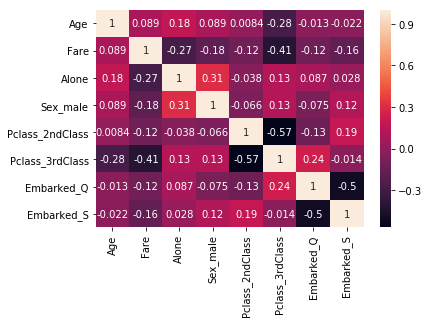

In [289]:
sns.heatmap(X_train.corr(),annot=True)

In [290]:
import statsmodels.api as sm

In [292]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.44
Date:                Tue, 06 Aug 2019   Deviance:                       796.88
Time:                        18:11:33   Pearson chi2:                     931.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8226      0.319      8.843      0.000       2.197       3.448
Age                -0.4405      0.098     -4.474      0.000      -0.634      -0.248
Fare                0.0163      0.110      0.149      0.882      -0.199       0.232
Alone               0.0736      0.197      0.374      0.708      -0.312       0.459
Sex_male           -2.5854      0.197    -13.145      0.000      -2.971      -2.200
Pclass_2ndClass    -0.9477      0.291     -3.255      0.001      -1.518      -0.377
Pclass_3rdClass    -2.2749      0.289     -7.873      0.000      -2.841      -1.709
Embarked_Q         -0.0040      0.373     -0.011      0.991      -0.735       0.727
Embarked_S         -0.5517      0.236     -2.337      0.019      -1.014      -0.089
===================================================================================
"""

In [293]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [296]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, Y_train)

In [297]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Age', True, 1),
 ('Fare', False, 2),
 ('Alone', False, 3),
 ('Sex_male', True, 1),
 ('Pclass_2ndClass', True, 1),
 ('Pclass_3rdClass', True, 1),
 ('Embarked_Q', False, 4),
 ('Embarked_S', True, 1)]

In [299]:
col = X_train.columns[rfe.support_]

In [300]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(Y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      883
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.51
Date:                Tue, 06 Aug 2019   Deviance:                       797.02
Time:                        18:14:20   Pearson chi2:                     934.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8610      0.266     10.736      0.000       2.339       3.383
Age                -0.4346      0.096     -4.525      0.000      -0.623      -0.246
Sex_male           -2.5675      0.188    -13.680      0.000      -2.935      -2.200
Pclass_2ndClass    -0.9566      0.263     -3.632      0.000      -1.473      -0.440
Pclass_3rdClass    -2.2829      0.242     -9.419      0.000      -2.758      -1.808
Embarked_S         -0.5543      0.200     -2.769      0.006      -0.947      -0.162
===================================================================================
"""

In [301]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.092202
1    0.929636
2    0.536527
3    0.893542
4    0.061630
5    0.120156
6    0.254024
7    0.165708
8    0.528178
9    0.919034
dtype: float64

In [302]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09220168, 0.9296361 , 0.53652663, 0.89354163, 0.06163027,
       0.12015619, 0.25402432, 0.16570799, 0.52817834, 0.91903367])

In [304]:
y_train_pred_final = pd.DataFrame({'Survived':Y_train.values, 'Survival_Prob':y_train_pred})
y_train_pred_final['PassengerId'] = Y_train.index
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId
0,0,0.092202,0
1,1,0.929636,1
2,1,0.536527,2
3,1,0.893542,3
4,0,0.061630,4


In [306]:
y_train_pred_final['predicted'] = y_train_pred_final.Survival_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Survived,Survival_Prob,PassengerId,predicted
0,0,0.092202,0,0
1,1,0.929636,1,1
2,1,0.536527,2,1
3,1,0.893542,3,1
4,0,0.061630,4,0


In [307]:
from sklearn import metrics

In [309]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.Survived)
print(confusion)

[[549   0]
 [  0 340]]


In [311]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.Survived))

1.0


In [312]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [313]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Embarked_S,3.08
3,Pclass_3rdClass,2.69
1,Sex_male,2.61
2,Pclass_2ndClass,1.67
0,Age,1.12


In [314]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [315]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

1.0

In [316]:
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [317]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [319]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survival_Prob, drop_intermediate = False )

In [320]:
# Logistic regression model
logm1 = sm.GLM(Y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  889
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -398.44
Date:                Tue, 06 Aug 2019   Deviance:                       796.88
Time:                        18:41:40   Pearson chi2:                     931.
No. Iterations:                     5   Covariance Type:             nonrobust
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.8226      0.319      8.843      0.000       2.197       3.448
Age                -0.4405      0.098     -4.474      0.000      -0.634      -0.248
Fare                0.0163      0.110      0.149      0.882      -0.199       0.232
Alone               0.0736      0.197      0.374      0.708      -0.312       0.459
Sex_male           -2.5854      0.197    -13.145      0.000      -2.971      -2.200
Pclass_2ndClass    -0.9477      0.291     -3.255      0.001      -1.518      -0.377
Pclass_3rdClass    -2.2749      0.289     -7.873      0.000      -2.841      -1.709
Embarked_Q         -0.0040      0.373     -0.011      0.991      -0.735       0.727
Embarked_S         -0.5517      0.236     -2.337      0.019      -1.014      -0.089
===================================================================================
"""

In [321]:
col = col.drop('Embarked_Q', 1)
col

KeyError: "labels ['Embarked_Q'] not contained in axis"

In [323]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission.csv', index=False)